# **Model Training**

## **Data Preprocessing**

In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, EditedNearestNeighbours, RepeatedEditedNearestNeighbours
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
main_df = pd.read_csv('data.csv')
main_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
main_df.shape

(381109, 12)

In [4]:
main_df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [5]:
# taking 20% of data for experimentation
df = main_df.iloc[:int(0.2*main_df.shape[0])]

In [6]:
# shape of experimentation data 
df.shape

(76221, 12)

In [7]:
df['Response'].value_counts()

Response
0    66789
1     9432
Name: count, dtype: int64

In [ ]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76221 entries, 0 to 76220
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    76221 non-null  int64  
 1   Gender                76221 non-null  object 
 2   Age                   76221 non-null  int64  
 3   Driving_License       76221 non-null  int64  
 4   Region_Code           76221 non-null  float64
 5   Previously_Insured    76221 non-null  int64  
 6   Vehicle_Age           76221 non-null  object 
 7   Vehicle_Damage        76221 non-null  object 
 8   Annual_Premium        76221 non-null  float64
 9   Policy_Sales_Channel  76221 non-null  float64
 10  Vintage               76221 non-null  int64  
 11  Response              76221 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 7.0+ MB


In [9]:
# removing unwanted columns
columns_to_remove = ['id', 'Driving_License']
df.drop(columns=columns_to_remove, inplace=True)

In [10]:
# unique values in region code
print("There are", df['Region_Code'].nunique(), "unique values of region code")

There are 53 unique values of region code


In [11]:
# reducing categories in region code column 
region_counts = df['Region_Code'].value_counts()
df['Region_Code'] = [i if region_counts[i] >= 6280 else 1.0 for i in df['Region_Code']]

In [12]:
# checkin unique values in Region_Code column
df['Region_Code'].unique()

array([28.,  1.,  8.])

In [13]:
# changing datatype to str
df['Region_Code'] = df['Region_Code'].astype(str)

In [14]:
# reducing categories in region code column
policy_sales_channel_count = df['Policy_Sales_Channel'].value_counts()
df['Policy_Sales_Channel'] = [i if policy_sales_channel_count[i] >= 1360 else 1.0 for i in df['Policy_Sales_Channel']]

In [15]:
# checking unique values in Policy_Sales_Channel column
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,   1., 156., 122.])

In [16]:
# changing datatype to str
df['Policy_Sales_Channel'] =df['Policy_Sales_Channel'].astype(str)

In [17]:
# encoding vehicle age column
df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype(int)

In [18]:
# head of dataset
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,2,Yes,40454.0,26.0,217,1
1,Male,76,1.0,0,1,No,33536.0,26.0,183,0
2,Male,47,28.0,0,2,Yes,38294.0,26.0,27,1
3,Male,21,1.0,1,0,No,28619.0,152.0,203,0
4,Female,29,1.0,1,0,No,27496.0,152.0,39,0


In [19]:
df_encoded = pd.get_dummies(df, dtype=int, drop_first=True)
df_encoded.head()

,Age,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Response,Gender_Male,Region_Code_28.0,Region_Code_8.0,Vehicle_Damage_Yes,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0
0,44,0,2,40454.0,217,1,1,1,0,1,0,0,0,0,0,1
1,76,0,1,33536.0,183,0,1,0,0,0,0,0,0,0,0,1
2,47,0,2,38294.0,27,1,1,1,0,1,0,0,0,0,0,1
3,21,1,0,28619.0,203,0,1,0,0,0,0,0,1,0,0,0
4,29,1,0,27496.0,39,0,0,0,0,0,0,0,1,0,0,0


In [20]:
# splitting data into X and y
X = df_encoded.drop(columns='Response')
y = df_encoded['Response']

In [21]:
X.shape

(76221, 15)

In [22]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [23]:
# capping values with maximum values (removing outliers)
X_train['Annual_Premium'] = [i if i < 61000 else 61000 for i in X_train['Annual_Premium']]

In [24]:
# random under sampling for balancing dataset
nn_under_sampler = RepeatedEditedNearestNeighbours(n_neighbors=4)
X_resampled, y_resampled = nn_under_sampler.fit_resample(X_train, y_train)

In [25]:
# printing shape of data
print("Shape of data before resampling:",X_train.shape)
print("Shape of data after resampling:",X_resampled.shape)
y_resampled.value_counts()

Shape of data before resampling: (68598, 15)
Shape of data after resampling: (32479, 15)


Response
0    23978
1     8501
Name: count, dtype: int64

In [26]:
columns_to_scale = ['Age', 'Annual_Premium', 'Vintage', 'Vehicle_Age']

scaler = MinMaxScaler()
X_resampled[columns_to_scale] = scaler.fit_transform(X_resampled[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [27]:
X_resampled

,Age,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Gender_Male,Region_Code_28.0,Region_Code_8.0,Vehicle_Damage_Yes,Policy_Sales_Channel_122.0,Policy_Sales_Channel_124.0,Policy_Sales_Channel_152.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_26.0
0,0.079365,1,0.0,0.000000,0.581315,1,0,0,0,0,0,1,0,0,0
1,0.126984,1,0.0,0.000000,0.958478,0,0,0,0,0,0,0,0,0,0
2,0.809524,0,0.5,0.000000,0.422145,1,0,0,1,1,0,0,0,0,0
3,0.063492,1,0.0,0.877334,0.844291,1,0,1,0,0,0,1,0,0,0
4,0.333333,1,0.5,0.416053,0.377163,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32474,0.142857,0,0.5,0.587048,0.653979,0,1,0,1,0,0,0,0,0,1
32475,0.365079,0,1.0,0.526932,0.719723,1,1,0,1,0,1,0,0,0,0
32476,0.396825,0,0.5,0.803495,0.110727,0,0,0,1,0,1,0,0,0,0
32477,0.158730,0,0.0,0.411530,0.138408,1,0,0,1,0,0,0,0,0,0


In [28]:
# importing all ml models for classifications
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

Logistic Regressor
Accuracy is:  0.73
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.72      0.83      6692
           1       0.29      0.81      0.43       931

    accuracy                           0.73      7623
   macro avg       0.63      0.77      0.63      7623
weighted avg       0.88      0.73      0.78      7623



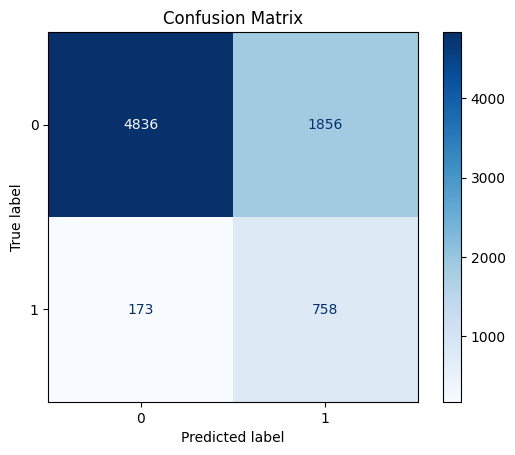

Knearest Neighbour Classifier
Accuracy is:  0.77
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.95      0.78      0.85      6692
           1       0.30      0.68      0.41       931

    accuracy                           0.77      7623
   macro avg       0.62      0.73      0.63      7623
weighted avg       0.87      0.77      0.80      7623



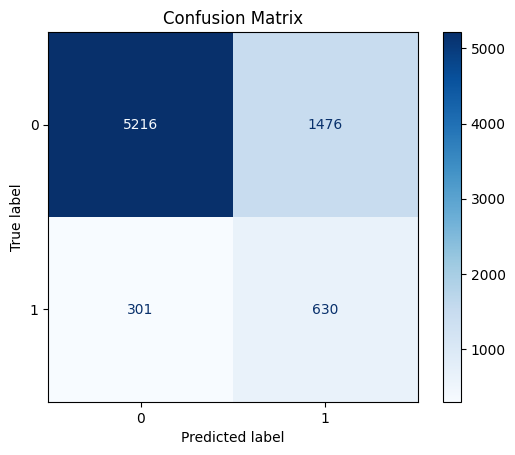

Decision Tree Classifier
Accuracy is:  0.75
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.94      0.77      0.84      6692
           1       0.27      0.62      0.38       931

    accuracy                           0.75      7623
   macro avg       0.60      0.70      0.61      7623
weighted avg       0.86      0.75      0.79      7623



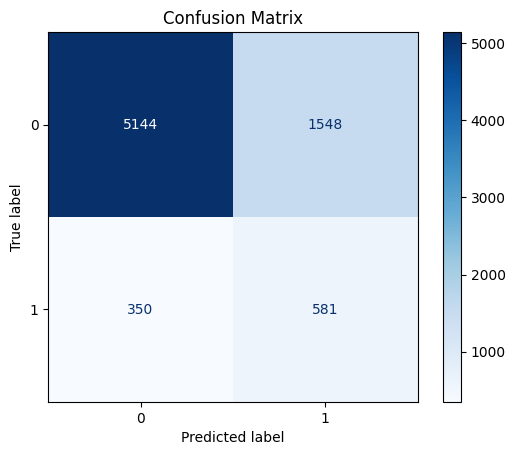

Random Forest Classifier
Accuracy is:  0.77
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.94      0.78      0.86      6692
           1       0.30      0.67      0.41       931

    accuracy                           0.77      7623
   macro avg       0.62      0.73      0.64      7623
weighted avg       0.87      0.77      0.80      7623



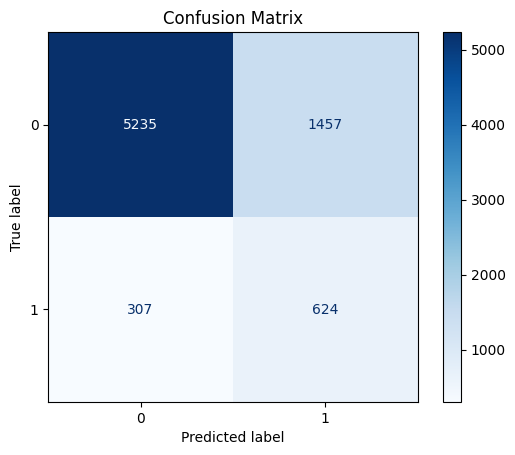

Gradient Boosting Classifier
Accuracy is:  0.76
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      6692
           1       0.31      0.80      0.44       931

    accuracy                           0.76      7623
   macro avg       0.64      0.78      0.64      7623
weighted avg       0.88      0.76      0.79      7623



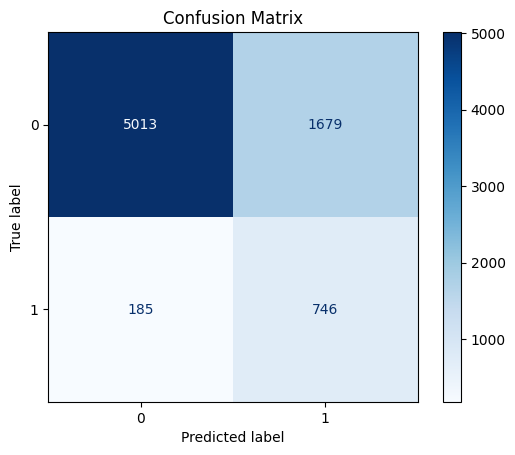

Support Vector Classifier
Accuracy is:  0.74
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.97      0.73      0.83      6692
           1       0.30      0.84      0.44       931

    accuracy                           0.74      7623
   macro avg       0.63      0.78      0.64      7623
weighted avg       0.89      0.74      0.78      7623



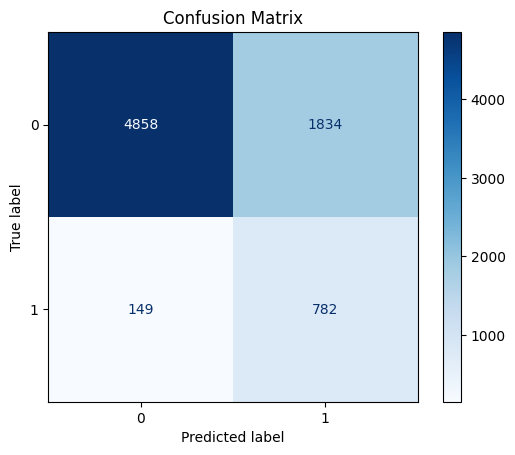

Adaboost Classifier
Accuracy is:  0.76
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.96      0.75      0.84      6692
           1       0.31      0.80      0.44       931

    accuracy                           0.76      7623
   macro avg       0.64      0.77      0.64      7623
weighted avg       0.88      0.76      0.79      7623



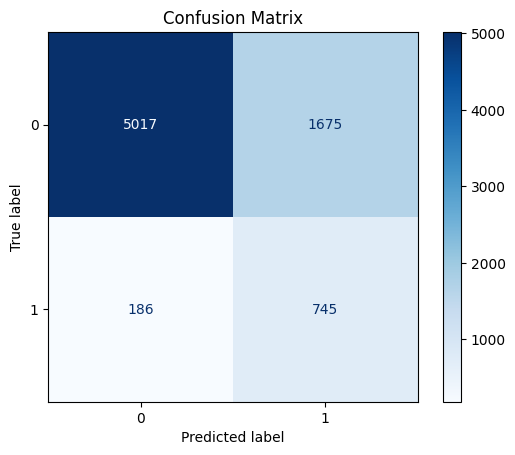

xgb Classifier
Accuracy is:  0.75
Classification report is as fallow: 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84      6692
           1       0.29      0.71      0.41       931

    accuracy                           0.75      7623
   macro avg       0.62      0.73      0.63      7623
weighted avg       0.87      0.75      0.79      7623



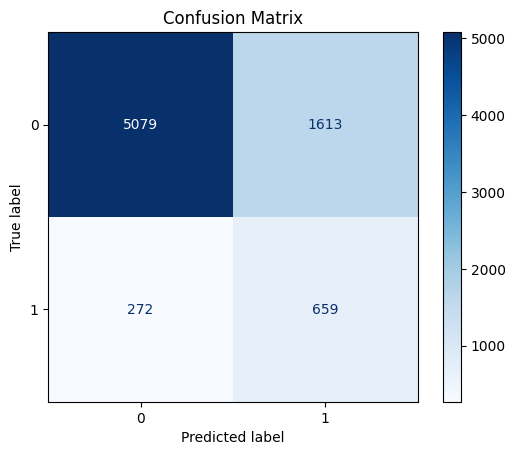

Learning rate set to 0.04554
0:	learn: 0.6236376	total: 105ms	remaining: 1m 45s
1:	learn: 0.5686015	total: 115ms	remaining: 57.4s
2:	learn: 0.5244001	total: 125ms	remaining: 41.4s
3:	learn: 0.4891791	total: 135ms	remaining: 33.5s
4:	learn: 0.4610232	total: 144ms	remaining: 28.7s
5:	learn: 0.4385066	total: 153ms	remaining: 25.4s
6:	learn: 0.4209596	total: 163ms	remaining: 23.2s
7:	learn: 0.4065914	total: 174ms	remaining: 21.5s
8:	learn: 0.3950451	total: 184ms	remaining: 20.3s
9:	learn: 0.3857550	total: 194ms	remaining: 19.2s
10:	learn: 0.3779804	total: 204ms	remaining: 18.4s
11:	learn: 0.3715281	total: 214ms	remaining: 17.6s
12:	learn: 0.3659607	total: 223ms	remaining: 17s
13:	learn: 0.3615225	total: 233ms	remaining: 16.4s
14:	learn: 0.3579176	total: 242ms	remaining: 15.9s
15:	learn: 0.3545219	total: 251ms	remaining: 15.4s
16:	learn: 0.3514331	total: 261ms	remaining: 15.1s
17:	learn: 0.3489452	total: 271ms	remaining: 14.8s
18:	learn: 0.3465375	total: 280ms	remaining: 14.5s
19:	learn: 0.

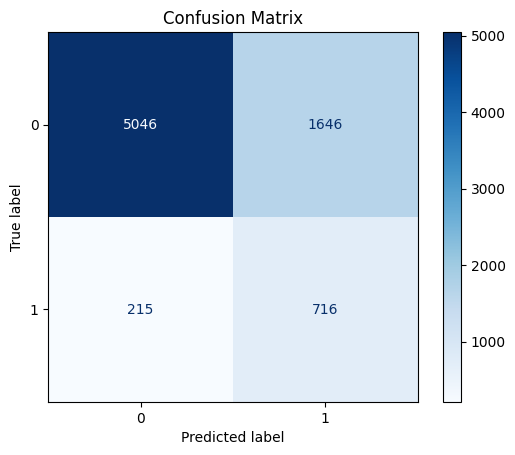

In [29]:
# experimenting with all models
models = {
    'Logistic Regressor': LogisticRegression(),
    'Knearest Neighbour Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Support Vector Classifier':SVC(),
    'Adaboost Classifier': AdaBoostClassifier(),
    'xgb Classifier': XGBClassifier(),
    'catboost Classifier': CatBoostClassifier()
}

# lists to save metrics
models_name = []
acc_score = []
precision = []
recall = []

# training each model and saving metrics
for i in range(len(list(models))):
    # printing model name
    model = list(models.values())[i]
    # training model
    model.fit(X_resampled, y_resampled)

    # making predictions
    y_pred = model.predict(X_test)

    # metrics
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    overall_precision = precision_score(y_test, y_pred)
    overall_recall = recall_score(y_test, y_pred)

    print(list(models.keys())[i])
    print("Accuracy is: ", accuracy)
    print("Classification report is as fallow: \n", classification_report(y_test, y_pred))

    # appending metrics to appropriate list
    acc_score.append(accuracy)
    precision.append(overall_precision)
    recall.append(overall_recall)
    models_name.append(list(models.keys())[i])

    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')  # Use a colormap for better visualization
    plt.title("Confusion Matrix")
    plt.show()
    print('='*100)

In [30]:
# creating dataframe for metrics
metrics_df = pd.DataFrame({'Model Names':models_name, 'Accuracy':acc_score, 
                           'Precision': precision, 'Recall':recall})

metrics_df.sort_values(by='Accuracy', ascending=False)

,Model Names,Accuracy,Precision,Recall
1,Knearest Neighbour Classifier,0.77,0.299145,0.676692
3,Random Forest Classifier,0.77,0.299856,0.670247
4,Gradient Boosting Classifier,0.76,0.307629,0.801289
6,Adaboost Classifier,0.76,0.307851,0.800215
8,catboost Classifier,0.76,0.303133,0.769066
2,Decision Tree Classifier,0.75,0.272898,0.624060
7,xgb Classifier,0.75,0.290053,0.707841
5,Support Vector Classifier,0.74,0.298930,0.839957
0,Logistic Regressor,0.73,0.289977,0.814178


Gradient boosting classifier shows good balance between precision and recall and has low training and inference time so we will go with Gradient Boosting Classifier

In [ ]:
# Hyper parameter tunning for Gradient Boosting Classifier

# Define the classifier
gbc = GradientBoostingClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for training each base learner
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Show process progress
)

# Fit the model on training data
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))
